# Crawling Tiga Kategori Berita

https://www.bbc.com/indonesia

In [ ]:
import pandas as pd
import requests as re
from bs4 import BeautifulSoup as bs
from urllib.request import Request, urlopen
import csv
import nltk
nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
header = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"}
url = 'https://www.bbc.com/indonesia/topics/cjgn7k8yx4gt'

judul = []
konten = []
kategori = []

req = re.get(url, headers=header)
soup = bs(req.text, 'html.parser')
cats = soup.findAll('div', 'bbc-14sj40g e11sm0on5')

for cat in cats:
  category = cat.find('span', 'bbc-12xbtlj ebniykg1').text.replace('Halaman saat ini,', '')
  kategori.extend([category] * 240)

for page in range(1, 11):
    req2 = re.get(url, headers=header)
    soup2 = bs(req.text, 'html.parser')
    items = soup2.findAll('div', 'bbc-bjn8wh e1v051r10')

    for it in items:
        try:
            link = it.find('a')['href']
        except:
            link = ''

        name = it.find('h2', 'bbc-110w6ng e47bds20').text
        judul.append(name)

        if link != '':
            req3 = re.get(link, headers=header)  # Perubahan: Menggunakan link langsung
            soup3 = bs(req3.text, 'html.parser')
            article = soup3.find("div", "bbc-1cvxiy9")

            # Periksa apakah elemen article ada sebelum mencoba mengambil teksnya
            if article is not None:
                article_text = article.get_text()
                sentences = nltk.sent_tokenize(article_text)
            konten.append(article_text)  # Perubahan: Menggunakan article_text bukan artikel itu sendiri

JudulBerita = pd.DataFrame(judul, columns=["Judul Berita"])
IsiBerita = pd.DataFrame(konten, columns=["Isi Berita"])
CatBerita = pd.DataFrame(kategori, columns=["Kategori Berita"])

BeritaIndo = pd.concat([JudulBerita, IsiBerita, CatBerita], axis=1)
BeritaIndo

,Judul Berita,Isi Berita,Kategori Berita
0,Viral penemuan lima mayat di Kampus Unpri Meda...,Viral penemuan lima mayat di Kampus Unpri Meda...,Indonesia
1,Debat capres berpengaruh terhadap pemilih meng...,Debat capres berpengaruh terhadap pemilih meng...,Indonesia
2,"Pilpres 2024: Apa janji capres soal hukum, HAM...","Pilpres 2024: Apa janji capres soal hukum, HAM...",Indonesia
3,TikTok Shop buka lagi setelah akuisisi Tokoped...,TikTok Shop buka lagi setelah akuisisi Tokoped...,Indonesia
4,Siapa yang menyebarkan narasi kebencian dan ho...,Siapa yang menyebarkan narasi kebencian dan ho...,Indonesia
...,...,...,...
235,Kasus Covid di Indonesia meningkat akibat vari...,Kasus Covid di Indonesia meningkat akibat vari...,Indonesia
236,Kisah penyintas erupsi Gunung Marapi hadapi hu...,Kisah penyintas erupsi Gunung Marapi hadapi hu...,Indonesia
237,Penantian seorang ibu di kaki Gunung Marapi,Penantian seorang ibu di kaki Gunung MarapiSum...,Indonesia
238,Pengungsi Rohingya di Aceh akan dikembalikan k...,Pengungsi Rohingya di Aceh akan dikembalikan k...,Indonesia


In [ ]:
header = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"}
url = 'https://www.bbc.com/indonesia/topics/cyz8evpl224t'

judul = []
konten = []
kategori = []

req = re.get(url, headers=header)
soup = bs(req.text, 'html.parser')
cats = soup.findAll('div', 'bbc-14sj40g e11sm0on5')

for cat in cats:
  category = cat.find('span', 'bbc-12xbtlj ebniykg1').text.replace('Halaman saat ini,', '')
  kategori.extend([category] * 240)

for page in range(1, 11):
    req2 = re.get(url, headers=header)
    soup2 = bs(req.text, 'html.parser')
    items = soup2.findAll('div', 'bbc-bjn8wh e1v051r10')

    for it in items:
        try:
            link = it.find('a')['href']
        except:
            link = ''

        name = it.find('h2', 'bbc-110w6ng e47bds20').text
        judul.append(name)

        if link != '':
            req3 = re.get(link, headers=header)  # Perubahan: Menggunakan link langsung
            soup3 = bs(req3.text, 'html.parser')
            article = soup3.find("div", "bbc-1cvxiy9")

            # Periksa apakah elemen article ada sebelum mencoba mengambil teksnya
            if article is not None:
                article_text = article.get_text()
                sentences = nltk.sent_tokenize(article_text)
            konten.append(article_text)  # Perubahan: Menggunakan article_text bukan artikel itu sendiri

JudulBerita = pd.DataFrame(judul, columns=["Judul Berita"])
IsiBerita = pd.DataFrame(konten, columns=["Isi Berita"])
CatBerita = pd.DataFrame(kategori, columns=["Kategori Berita"])

BeritaDunia = pd.concat([JudulBerita, IsiBerita, CatBerita], axis=1)
BeritaDunia

,Judul Berita,Isi Berita,Kategori Berita
0,Kasus pemukulan wasit sepak bola adalah 'cermi...,Kasus pemukulan wasit sepak bola adalah 'cermi...,Dunia
1,"'Hari bersejarah', Majelis Umum PBB dukung gen...","'Hari bersejarah', Majelis Umum PBB dukung gen...",Dunia
2,Kesaksian dokter bedah di Gaza: 'Hati ini hanc...,Kesaksian dokter bedah di Gaza: 'Hati ini hanc...,Dunia
3,Siapa yang menyebarkan narasi kebencian dan ho...,Siapa yang menyebarkan narasi kebencian dan ho...,Dunia
4,Ancaman PHK di Indonesia imbas aksi boikot Isr...,Ancaman PHK di Indonesia imbas aksi boikot Isr...,Dunia
...,...,...,...
235,Temuan gas beracun yang mengancam kesehatan ju...,Temuan gas beracun yang mengancam kesehatan ju...,Dunia
236,Keruntuhan mafia China di pusat bisnis penipua...,Keruntuhan mafia China di pusat bisnis penipua...,Dunia
237,"Siapa David Ben-Gurion, proklamator dan bapak ...","Siapa David Ben-Gurion, proklamator dan bapak ...",Dunia
238,Kisah bocah Palestina yang ditangkap Israel - ...,Kisah bocah Palestina yang ditangkap Israel - ...,Dunia


In [ ]:
header = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"}
url = 'https://www.bbc.com/indonesia/topics/cn5w7g2nq6dt'

judul = []
konten = []
kategori = []

req = re.get(url, headers=header)
soup = bs(req.text, 'html.parser')
cats = soup.findAll('div', 'bbc-14sj40g e11sm0on5')

for cat in cats:
  category = cat.find('span', 'bbc-12xbtlj ebniykg1').text.replace('Halaman saat ini,', '')
  kategori.extend([category] * 240)

for page in range(1, 11):
    req2 = re.get(url, headers=header)
    soup2 = bs(req.text, 'html.parser')
    items = soup2.findAll('div', 'bbc-bjn8wh e1v051r10')

    for it in items:
        try:
            link = it.find('a')['href']
        except:
            link = ''

        name = it.find('h2', 'bbc-110w6ng e47bds20').text
        judul.append(name)

        if link != '':
            req3 = re.get(link, headers=header)  # Perubahan: Menggunakan link langsung
            soup3 = bs(req3.text, 'html.parser')
            article = soup3.find("div", "bbc-1cvxiy9")

            # Periksa apakah elemen article ada sebelum mencoba mengambil teksnya
            if article is not None:
                article_text = article.get_text()
                sentences = nltk.sent_tokenize(article_text)
            konten.append(article_text)  # Perubahan: Menggunakan article_text bukan artikel itu sendiri

JudulBerita = pd.DataFrame(judul, columns=["Judul Berita"])
IsiBerita = pd.DataFrame(konten, columns=["Isi Berita"])
CatBerita = pd.DataFrame(kategori, columns=["Kategori Berita"])

BeritaViral = pd.concat([JudulBerita, IsiBerita, CatBerita], axis=1)
BeritaViral

,Judul Berita,Isi Berita,Kategori Berita
0,Bunga Citra Lestari dicibir warganet karena me...,Bunga Citra Lestari dicibir warganet karena me...,Viral
1,Teori memurtadkan perempuan Muslim lewat asmar...,Teori memurtadkan perempuan Muslim lewat asmar...,Viral
2,Kisah polwan yang menyusui bayi korban bencana,Kisah polwan yang menyusui bayi korban bencana...,Viral
3,Apa makna semangka bagi rakyat Palestina?,Apa makna semangka bagi rakyat Palestina?Sumbe...,Viral
4,‘Kita bahagia walaupun hidup sederhana’ – Kisa...,‘Kita bahagia walaupun hidup sederhana’ – Kisa...,Viral
...,...,...,...
235,Demonstrasi anti-LGBT warnai konser Coldplay d...,Demonstrasi anti-LGBT warnai konser Coldplay d...,Viral
236,"SEA Games 2023 'dihujani kritik', apa yang seb...","SEA Games 2023 'dihujani kritik', apa yang seb...",Viral
237,"Fenomena ‘garasi’ di jalan umum, mengapa selal...","SEA Games 2023 'dihujani kritik', apa yang seb...",Viral
238,Presiden Jokowi ambil alih perbaikan jalan di ...,"SEA Games 2023 'dihujani kritik', apa yang seb...",Viral


In [ ]:
GabunganBerita = pd.concat([BeritaIndo, BeritaDunia, BeritaViral]).reset_index(drop=True)
GabunganBerita

,Judul Berita,Isi Berita,Kategori Berita
0,Viral penemuan lima mayat di Kampus Unpri Meda...,Viral penemuan lima mayat di Kampus Unpri Meda...,Indonesia
1,Debat capres berpengaruh terhadap pemilih meng...,Debat capres berpengaruh terhadap pemilih meng...,Indonesia
2,"Pilpres 2024: Apa janji capres soal hukum, HAM...","Pilpres 2024: Apa janji capres soal hukum, HAM...",Indonesia
3,TikTok Shop buka lagi setelah akuisisi Tokoped...,TikTok Shop buka lagi setelah akuisisi Tokoped...,Indonesia
4,Siapa yang menyebarkan narasi kebencian dan ho...,Siapa yang menyebarkan narasi kebencian dan ho...,Indonesia
...,...,...,...
715,Demonstrasi anti-LGBT warnai konser Coldplay d...,Demonstrasi anti-LGBT warnai konser Coldplay d...,Viral
716,"SEA Games 2023 'dihujani kritik', apa yang seb...","SEA Games 2023 'dihujani kritik', apa yang seb...",Viral
717,"Fenomena ‘garasi’ di jalan umum, mengapa selal...","SEA Games 2023 'dihujani kritik', apa yang seb...",Viral
718,Presiden Jokowi ambil alih perbaikan jalan di ...,"SEA Games 2023 'dihujani kritik', apa yang seb...",Viral


In [ ]:
GabunganBerita.to_csv('berita-BBC.csv', index=False)

In [ ]:
df = pd.read_csv('berita-BBC.csv')
df

,Judul Berita,Isi Berita,Kategori Berita
0,Viral penemuan lima mayat di Kampus Unpri Meda...,Viral penemuan lima mayat di Kampus Unpri Meda...,Indonesia
1,Debat capres berpengaruh terhadap pemilih meng...,Debat capres berpengaruh terhadap pemilih meng...,Indonesia
2,"Pilpres 2024: Apa janji capres soal hukum, HAM...","Pilpres 2024: Apa janji capres soal hukum, HAM...",Indonesia
3,TikTok Shop buka lagi setelah akuisisi Tokoped...,TikTok Shop buka lagi setelah akuisisi Tokoped...,Indonesia
4,Siapa yang menyebarkan narasi kebencian dan ho...,Siapa yang menyebarkan narasi kebencian dan ho...,Indonesia
...,...,...,...
715,Demonstrasi anti-LGBT warnai konser Coldplay d...,Demonstrasi anti-LGBT warnai konser Coldplay d...,Viral
716,"SEA Games 2023 'dihujani kritik', apa yang seb...","SEA Games 2023 'dihujani kritik', apa yang seb...",Viral
717,"Fenomena ‘garasi’ di jalan umum, mengapa selal...","SEA Games 2023 'dihujani kritik', apa yang seb...",Viral
718,Presiden Jokowi ambil alih perbaikan jalan di ...,"SEA Games 2023 'dihujani kritik', apa yang seb...",Viral


In [ ]:
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import nltk
import re
import joblib

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df.isnull().sum()

Judul Berita       0
Isi Berita         0
Kategori Berita    0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

Judul Berita       0
Isi Berita         0
Kategori Berita    0
dtype: int64

In [ ]:
df.shape

(720, 3)

In [ ]:
def cleaning(text):
  text = re.sub(r'[^\w\s.?!,]', '', text).strip()
  return text

df['Cleaning'] = df['Isi Berita'].apply(cleaning)
df['Cleaning']

0      Viral penemuan lima mayat di Kampus Unpri Meda...
1      Debat capres berpengaruh terhadap pemilih meng...
2      Pilpres 2024 Apa janji capres soal hukum, HAM,...
3      TikTok Shop buka lagi setelah akuisisi Tokoped...
4      Siapa yang menyebarkan narasi kebencian dan ho...
                             ...                        
715    Demonstrasi antiLGBT warnai konser Coldplay di...
716    SEA Games 2023 dihujani kritik, apa yang seben...
717    SEA Games 2023 dihujani kritik, apa yang seben...
718    SEA Games 2023 dihujani kritik, apa yang seben...
719    Polda Lampung hentikan kasus TikToker Bima, pa...
Name: Cleaning, Length: 720, dtype: object

In [ ]:
def tokenizer(text):
  text = text.lower()
  return sent_tokenize(text)

df['Tokenizing'] = df['Cleaning'].apply(tokenizer)
df['Tokenizing']

0      [viral penemuan lima mayat di kampus unpri med...
1      [debat capres berpengaruh terhadap pemilih men...
2      [pilpres 2024 apa janji capres soal hukum, ham...
3      [tiktok shop buka lagi setelah akuisisi tokope...
4      [siapa yang menyebarkan narasi kebencian dan h...
                             ...                        
715    [demonstrasi antilgbt warnai konser coldplay d...
716    [sea games 2023 dihujani kritik, apa yang sebe...
717    [sea games 2023 dihujani kritik, apa yang sebe...
718    [sea games 2023 dihujani kritik, apa yang sebe...
719    [polda lampung hentikan kasus tiktoker bima, p...
Name: Tokenizing, Length: 720, dtype: object

In [ ]:
def graph_cosine_sim(x, threshold = 0.11):
  # TFIDF
  vectorizer = TfidfVectorizer()
  tfidf = vectorizer.fit_transform(x)
  cos_sim = cosine_similarity(tfidf)
  G = nx.Graph()

  # Mengisi nilai similarity antara kalimat ke dalam edges (Garis Penghubung)
  for i in range(len(x)):
    for j in range(i+1, len(x)):
      sim = cos_sim[i][j]
      if sim > threshold:
        G.add_edge(i, j, weight=sim)

  return G

In [ ]:
def plot_graph(G, figsize=(35, 30), node_size=700, node_color='skyblue'):
  # Menggambar graf dengan canvas yang diperbesar
  pos = nx.spring_layout(G)  # Menentukan posisi simpul
  labels = nx.get_edge_attributes(G, 'weight')

  # Menentukan ukuran canvas
  plt.figure(figsize=(35, 30))

  # Menggambar graf dengan ukuran canvas yang diperbesar
  nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
  plt.show()

In [ ]:
def summarization(x, k = 4, index=1, threshold=0.11, show_centrality=False):
  # Memasukkan Nilai Cosine Similirity ke dalam Graph
  G = graph_cosine_sim(x, threshold)

  # Menghitung nilai dari closeness centrality
  centrality = nx.closeness_centrality(G)
  if show_centrality:
    print(f"Nilai Closeness Centrality Dokumen Ke - {index} : {centrality}")

  # Menyusun Kalimat berdasarkan nilai Closeness Centrality tertinggi dan lebih dari treshold
  centrality = dict(sorted(centrality.items(), key=lambda item : item[1], reverse=True))

  summary_sentences = []
  for i, centr in enumerate(centrality.items()):
    if i < k:
      summary_sentences.append(x[centr[0]])

  return (' '.join(summary_sentences), G)

In [ ]:
summary, G = summarization(df["Tokenizing"].iloc[:1][0], k = 5, show_centrality=True, threshold=0.2)

Nilai Closeness Centrality Dokumen Ke - 1 : {0: 0.3537068477645727, 1: 0.3305129561078794, 5: 0.2880184331797235, 16: 0.2839618355293048, 17: 0.3537068477645727, 23: 0.31502016129032256, 24: 0.3251821019771071, 3: 0.31017369727047145, 26: 0.31502016129032256, 2: 0.03225806451612903, 4: 0.03225806451612903, 25: 0.33602150537634407, 27: 0.22653135193910837, 42: 0.23719165085388993, 6: 0.1920122887864823, 7: 0.2489048187972919, 10: 0.2400153609831029, 20: 0.1957406827435014, 12: 0.2584780810587262, 15: 0.2800179211469534, 13: 0.22910557184750735, 18: 0.25520620661494486, 39: 0.25520620661494486, 19: 0.158750317500635, 28: 0.2400153609831029, 37: 0.1902008520998174, 29: 0.15508684863523572, 30: 0.03225806451612903, 40: 0.03225806451612903, 32: 0.03225806451612903, 36: 0.03225806451612903, 41: 0.1957406827435014}


In [ ]:
summary

'viral penemuan lima mayat di kampus unpri medan  korban pembunuhan atau kadaver? kalaupun terjadi tindak pembunuhan di lingkungan kampus, maka ia sebagai salah satu pimpinan yang pertama akan melaporkan tindak pidana tersebut kepada pihak yang berwajib, katanya.saya salah satu pimpinan universitas menyatakan tidak ada kasus pembunuhan di lingkungan unpri seperti yang diisukan, ujarnya dalam video youtube primtv pada rabu 1312.sumber gambar, kompas.comketerangan gambar, polisi telah mengerahkan tim dari laboratorium forensik dan inafis untuk mengusut temuan mayat itu.dia kemudian menjelaskan bahwa lima mayat tersebut merupakan kadaver atau tubuh manusia yang diawetkan sebagai media belajar di laboratorium anatomi.yang mana laboratorium anatomi fakultas kedokteran unpri medan memiliki lima kadaver 1 perempuan dan 4 lakilaki.kadaver tersebut telah diadakan oleh rektor terdahulu prof jakobus tarigan pada tahun 2005, jelasnya. kita akan minta keterangan dari pihak kampus, dari mana asal je

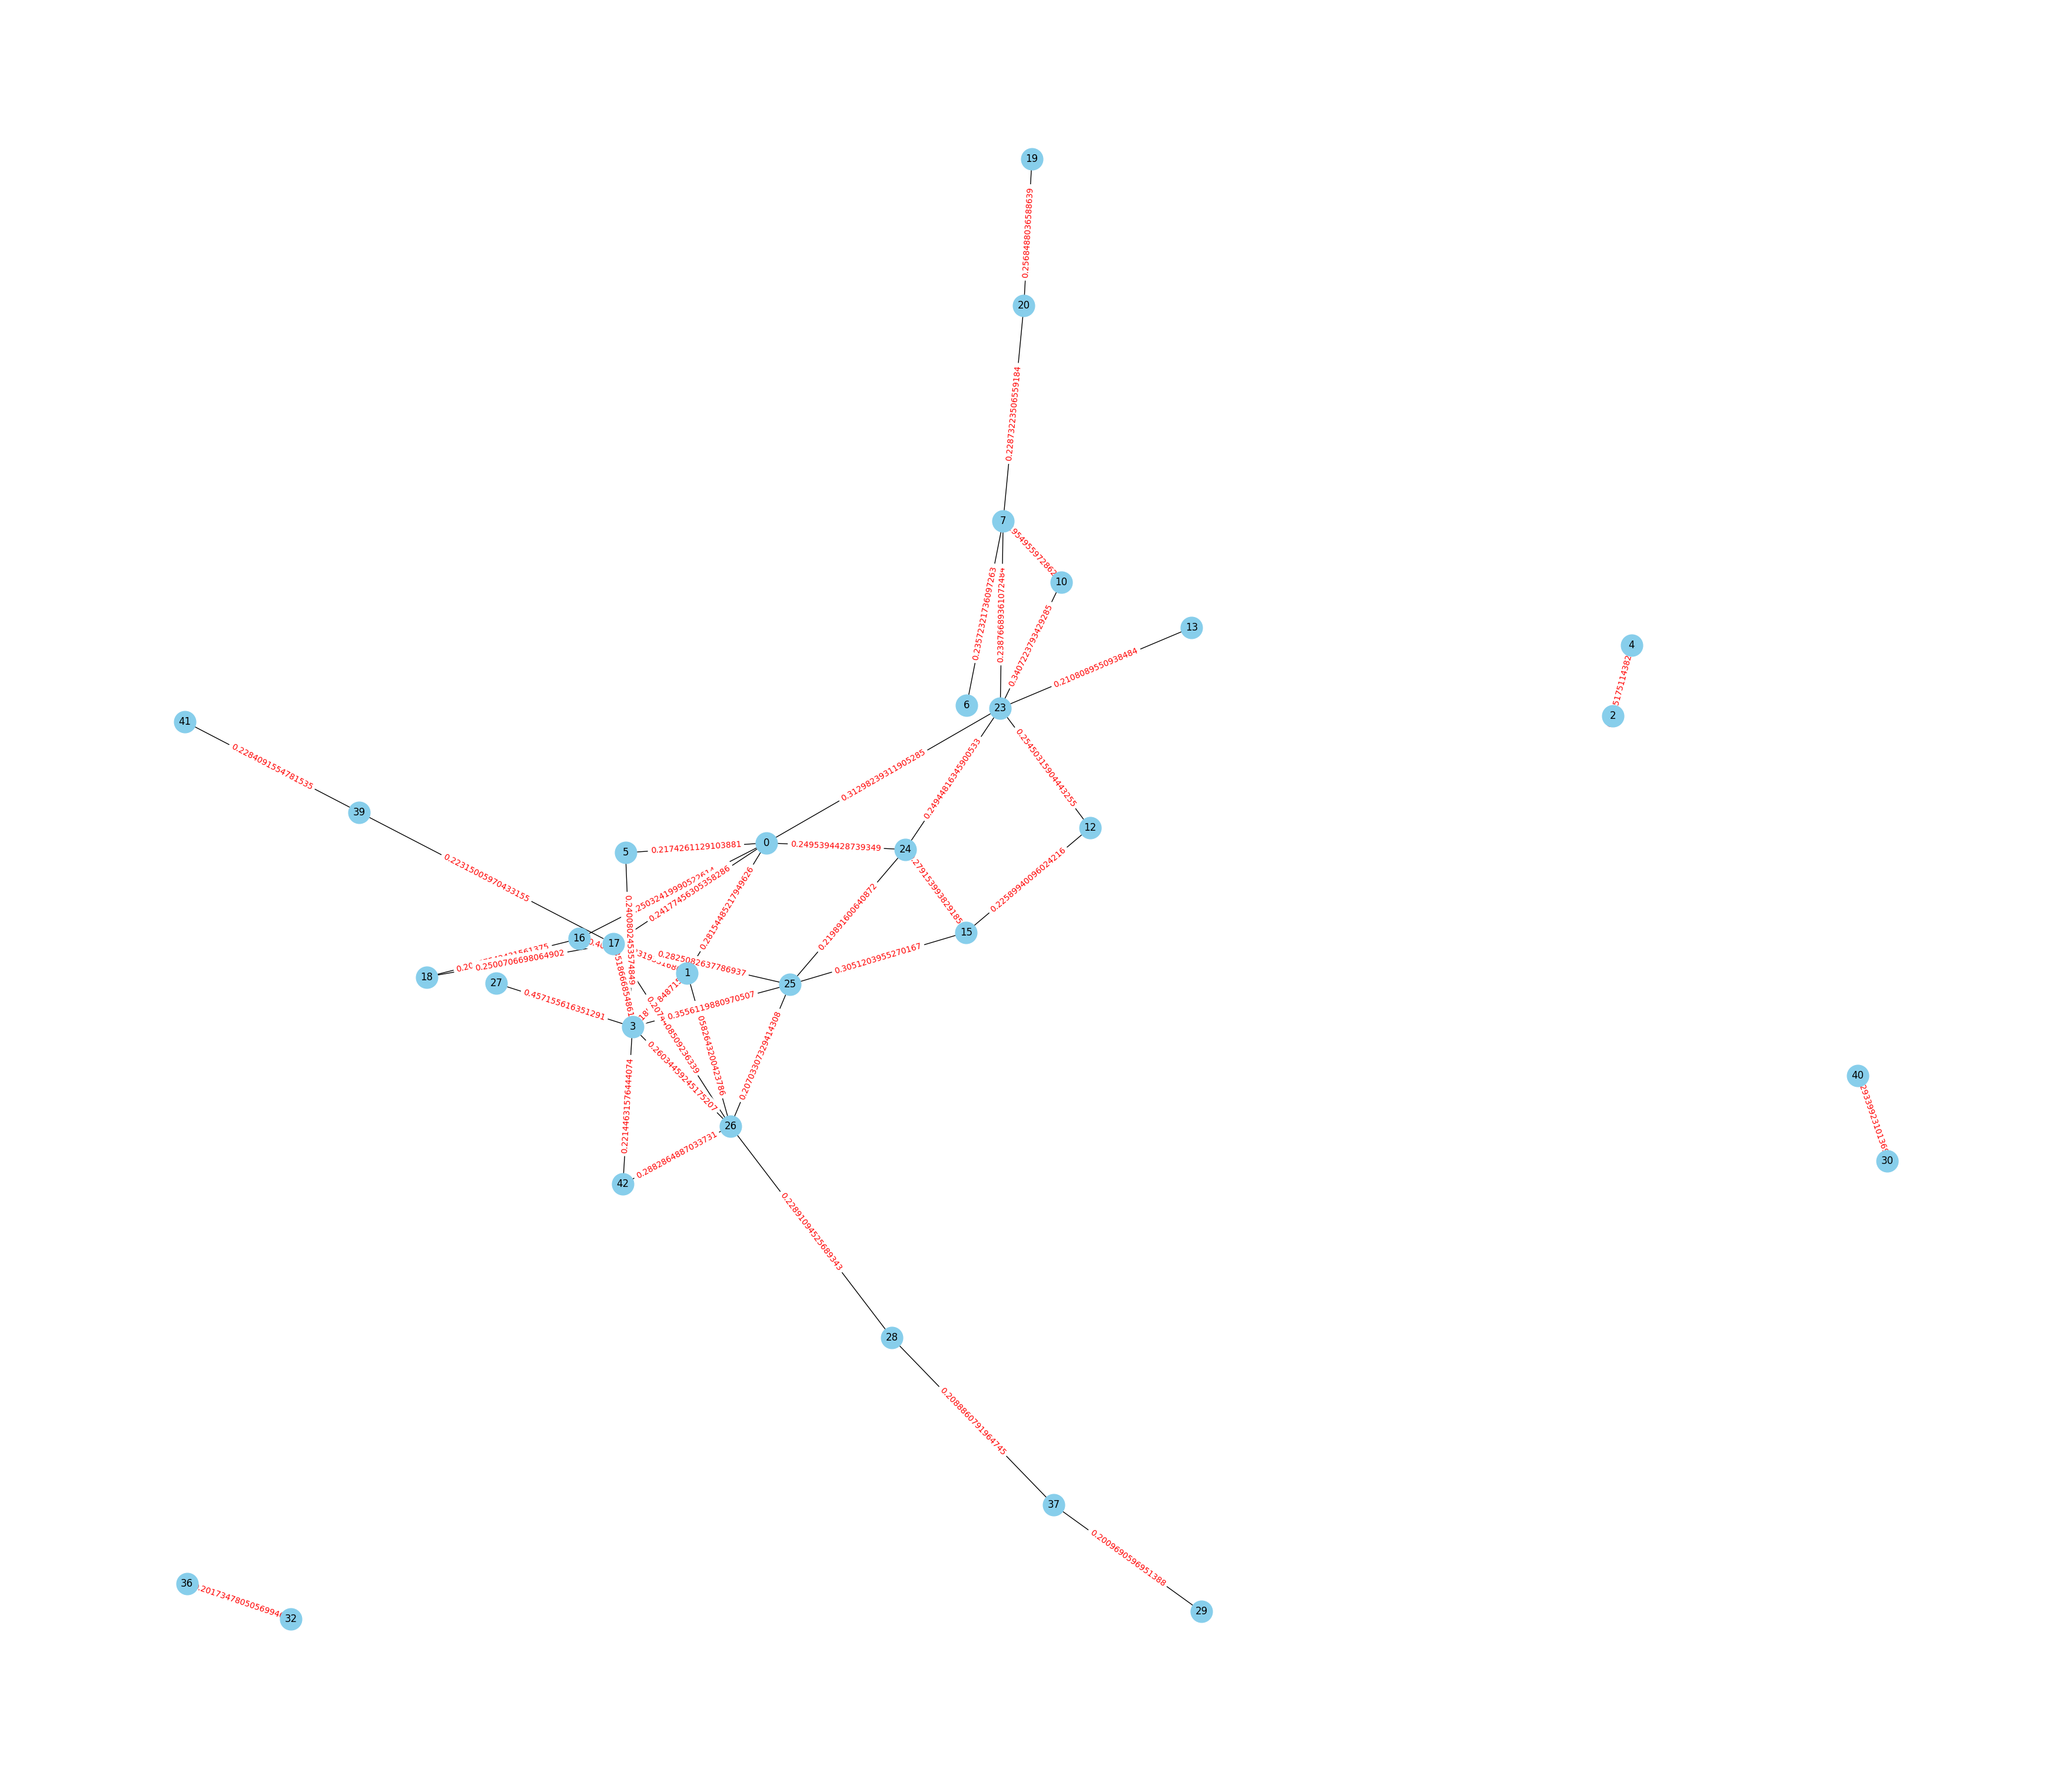

In [ ]:
plot_graph(G)

In [ ]:
df["Summary"] = df.apply(lambda row : summarization(row['Tokenizing'], index=row.name+1, k=7, show_centrality=True)[0], axis=1)

Nilai Closeness Centrality Dokumen Ke - 1 : {0: 0.6060606060606061, 1: 0.5970149253731343, 2: 0.5633802816901409, 3: 0.6896551724137931, 4: 0.4878048780487805, 5: 0.5, 10: 0.5, 12: 0.5882352941176471, 15: 0.5633802816901409, 16: 0.5263157894736842, 17: 0.7272727272727273, 18: 0.6153846153846154, 19: 0.5405405405405406, 23: 0.625, 24: 0.5633802816901409, 25: 0.5714285714285714, 26: 0.6666666666666666, 27: 0.5633802816901409, 28: 0.5405405405405406, 29: 0.49382716049382713, 37: 0.45977011494252873, 34: 0.5714285714285714, 35: 0.47619047619047616, 7: 0.547945205479452, 8: 0.47619047619047616, 30: 0.47619047619047616, 32: 0.5633802816901409, 36: 0.47619047619047616, 42: 0.4878048780487805, 6: 0.4819277108433735, 20: 0.5797101449275363, 22: 0.43956043956043955, 9: 0.38461538461538464, 41: 0.45454545454545453, 11: 0.425531914893617, 13: 0.4444444444444444, 33: 0.449438202247191, 38: 0.5633802816901409, 43: 0.45454545454545453, 39: 0.5, 40: 0.4}
Nilai Closeness Centrality Dokumen Ke - 2 : {0:

In [ ]:
new_df = df[["Summary", "Kategori Berita"]]
new_df

,Summary,Kategori Berita
0,kalaupun terjadi tindak pembunuhan di lingkung...,Indonesia
1,"sementara, para pemilih mengambang atau undeci...",Indonesia
2,"pilpres 2024 apa janji capres soal hukum, ham,...",Indonesia
3,"kalau yang nonton saja cuma segitu, apalagi ya...",Indonesia
4,dan tujuh hal mengenai rohingyadugaan penyelun...,Indonesia
...,...,...
715,"kini situasi yang sama juga terjadi, kata nura...",Viral
716,"amalia cahaya pratiwi, atlet bulutangkis indon...",Viral
717,"amalia cahaya pratiwi, atlet bulutangkis indon...",Viral
718,"amalia cahaya pratiwi, atlet bulutangkis indon...",Viral


In [ ]:
new_df.to_csv('Berita Hasil Ringkasan.csv')

In [ ]:
df["Summary"][0]

'kalaupun terjadi tindak pembunuhan di lingkungan kampus, maka ia sebagai salah satu pimpinan yang pertama akan melaporkan tindak pidana tersebut kepada pihak yang berwajib, katanya.saya salah satu pimpinan universitas menyatakan tidak ada kasus pembunuhan di lingkungan unpri seperti yang diisukan, ujarnya dalam video youtube primtv pada rabu 1312.sumber gambar, kompas.comketerangan gambar, polisi telah mengerahkan tim dari laboratorium forensik dan inafis untuk mengusut temuan mayat itu.dia kemudian menjelaskan bahwa lima mayat tersebut merupakan kadaver atau tubuh manusia yang diawetkan sebagai media belajar di laboratorium anatomi.yang mana laboratorium anatomi fakultas kedokteran unpri medan memiliki lima kadaver 1 perempuan dan 4 lakilaki.kadaver tersebut telah diadakan oleh rektor terdahulu prof jakobus tarigan pada tahun 2005, jelasnya. kabid humas polda sumut, kombes hadi wahyudi, mengatakan polisi telah mengerahkan tim dari laboratorium forensik dan inafis untuk mengusut temua

In [ ]:
vectorizer_summary = TfidfVectorizer()
X_summary = vectorizer_summary.fit_transform(df["Summary"]).toarray()
y = df["Kategori Berita"]

In [ ]:
X_train_summary, X_test_summary, y_train_summary, y_test_summary = train_test_split(X_summary, y, test_size=0.3, random_state=42)

In [ ]:
# Inisialisasi model Naive Bayes Gaussian
gnb_summary = GaussianNB()

# Melatih model menggunakan data latih
gnb_summary.fit(X_train_summary, y_train_summary)

# Membuat prediksi pada data uji
y_pred_gnb_summary = gnb_summary.predict(X_test_summary)

# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy = accuracy_score(y_test_summary, y_pred_gnb_summary)
print(f'Akurasi: {accuracy}')

In [ ]:
report = classification_report(y_test_summary, y_pred_gnb_summary)
print(f'Report Klasifikasi:\n{report}')

In [ ]:
def plot_confusion_matrix(cm):
  # Membuat plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gnb_summary.classes_, yticklabels=gnb_summary.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

cm = confusion_matrix(y_test_summary, y_pred_gnb_summary)
plot_confusion_matrix(cm)

In [ ]:
new_data = ['Gejala dan permasalahan geografi di setiap daerah berbeda-beda. Masing-masing daerah memiliki faktor dan ciri khasnya masing-masing. Ada satu wilayah yang cocok ditanami vegetasi tertentu dan tidak bisa ditanami vegetasi lainnya. Perbedaan antar wilayah tersebut, dalam ilmu geografi dikaji dalam salah satu konsep dasar yaitu konsep diferensiasi area. Terdapat 10 konsep dasar dalam ilmu geografi di antaranya lokasi, jarak, morfologi, keterjangkauan, pola, aglomerasi, nilai kegunaan, interdependensi, keterkaitan ruang, dan diferensiasi area. SCROLL TO CONTINUE WITH CONTENT Pada kesempatan kali ini, mari kita membahas tentang konsep diferensiasi area beserta dengan contohnya. Jadi, yuk simak artikel ini sampai akhir. Konsep diferensiasi area mengemukakan bahwa fenomena yang ada di muka bumi memiliki perbedaan dan ciri khas masing-masing Dikutip dari buku Explore Geografi Jilid 1 untuk SMA/MA Kelas X karya Dra Sri Wiyanti, MPd dkk., konsep diferensiasi area berhubungan dengan perbedaan fenomena yang terjadi di setiap wilayah. Pengertian konsep diferensiasi area juga merujuk pada keunikan karakteristik suatu wilayah jika dibandingkan dengan wilayah lainnya. Mengutip dari e-Modul Pembelajaran SMA Geografi Kelas X karya Fitri Sekar Lestari, diferensiasi area adalah konsep yang membandingkan dua wilayah untuk menunjukkan karakteristik khasnya masing-masing. Dengan demikian, konsep diferensiasi area mempertegas bahwa antara satu tempat dengan tempat lainnya memiliki perbedaan. Baik kondisi secara fisik, sumber daya alam, hingga sumber daya manusianya. Hal ini karena berbagai gejala dan permasalahan geografis tersebar dalam ruang yang memiliki karakteristik yang berbeda-beda. Konsep ini mencakup pemahaman mendalam terhadap faktor-faktor geografis, sosial, dan ekonomi yang memberikan ciri khas dan identitas unik kepada suatu daerah. Dengan menganalisis perbedaan ini, ahli geografi dapat mengeksplorasi dinamika spasial dan temporal serta mengidentifikasi pola-pola yang membentuk keberagaman wilayah. Berdasarkan penjelasan di atas, berikut beberapa contoh konsep diferensiasi area dalam ruang lingkup geografi: 1. Jenis ikan yang dibudidayakan di air tawar berbeda dengan jenis ikan yang ada di air payau. 2. Permasalahan-permasalahan perkotaan yang sejenis dengan kota lain akan memerlukan alternatif pemecahan masalah yang berbeda sesuai dengan karakteristik keruangannya. 3. Jenis tanaman yang dibudidayakan di dataran tinggi akan berbeda dengan jenis di dataran rendah, seperti teh yang cocok di dataran tinggi dan jagung di dataran rendah. 4. Komoditas utama yang dihasilkan oleh masyarakat pedesaan adalah hasil pertanian, sedangkan yang dihasilkan di daerah perkotaan adalah barang industri 5. Masyarakat di daerah pegunungan cenderung menggunakan pakaian yang tebal, berbeda dengan masyarakat yang tinggal di pesisir pantai yang lebih sering menggunakan pakaian tipis. 6. Meskipun sama-sama wilayah karst, tetapi bentuk kenampakan lahan tetap berbeda. Misalkan kawasan karst Gunung Sewu memiliki satuan bentuk lahan kerucut sedangkan di kawasan Raja Ampat memiliki satuan lahan menara karst. 7. Kondisi biosfer yang berbeda-beda seperti bioma gurun, tundra, taiga, sabana, atau hutan hujan tropis menyebabkan perbedaan flora dan fauna yang tinggal di bioma satu dengan lainnya. 8. Perbedaan topografi dan relief antar wilayah menimbulkan kenampakan alam yang berbeda-beda seperti pegunungan, lembah, atau dataran rendah sehingga menciptakan perbedaan distribusi sumber daya alam. Itulah penjelasan tentang konsep diferensiasi area yang menekankan adanya perbedaan karakteristik di setiap wilayah.	']
new_data_summary, G = summarization(tokenizer(new_data[0]), k=5)
new_data_summary

In [ ]:
tfidf_Xnew_summary = vectorizer_summary.transform([new_data_summary]).toarray()
tfidf_Xnew_summary

In [ ]:
pred_gnb_summary = gnb_summary.predict(tfidf_Xnew_summary)
pred_gnb_summary[0]

In [ ]:
joblib.dump(gnb_summary, 'modelNB.pkl')

In [ ]:
svm_summary = SVC()

# Melatih model menggunakan data latih
svm_summary.fit(X_train_summary, y_train_summary)

# Membuat prediksi pada data uji
y_pred_svm_summary = svm_summary.predict(X_test_summary)

# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy = accuracy_score(y_test_summary, y_pred_svm_summary)
print(f'Akurasi: {accuracy}')

In [ ]:
report = classification_report(y_test_summary, y_pred_svm_summary)
print(f'Report Klasifikasi:\n{report}')

In [ ]:
def plot_confusion_matrix(cm):
  # Membuat plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_summary.classes_, yticklabels=svm_summary.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

cm = confusion_matrix(y_test_summary, y_pred_svm_summary)
plot_confusion_matrix(cm)

In [ ]:
new_data = ['Menteri Perdagangan Zulkifli Hasan atau Zulhas menjelaskan progres utang atau pembayaran selisih harga minyak goreng (rafaksi) 2022 kepada pengusaha. Zulhas mengatakan sampai saat ini pihak pemerintah memang belum memproses pembayaran utang tersebut kepada pengusaha.Adapun pembayaran utang rafaksi tersebut dilakukan oleh Badan Pengelola Dana Perkebunan Kelapa Sawit (BPDPKS). Namun, pembayaran itu harus atas rekomendasi Kemendag. Dapat kami sampaikan terkait dengan rafaksi minyak goreng di mana saat ini BPDPKS belum melakukan pembayaran dikarenakan Kemendag selaku lembaga verifikator belum menyampaikan hasil verifikasi yang dilakukan oleh PT Sucofindo kepada BPDKS, kata Zulhas dalam rapat dengan Kementerian Perdagangan dengan Komisi VI DPR RI, Senin (27/11/2023). Baca artikel detikfinance, Di Depan DPR Zulhas Buka-bukaan soal Utang Pemerintah ke Pengusaha Minyak Goreng']
new_data_summary, G = summarization(tokenizer(new_data[0]), k=5)
new_data_summary

In [ ]:
tfidf_Xnew_summary = vectorizer_summary.transform([new_data_summary]).toarray()
tfidf_Xnew_summary

In [ ]:
joblib.dump(svm_summary, 'modelSVM.pkl')

In [ ]:
joblib.dump(vectorizer_summary, 'vectorizer.pkl')